<a href="https://colab.research.google.com/github/mrizal0/Customers-Churn-Analysis/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from inspect import cleandoc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/portofolio/new_train.csv')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
df.isna() .sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [ ]:
df.duplicated() .sum()

8

In [ ]:
df_clean = df.drop_duplicates()

In [ ]:
df_clean.shape

(32942, 16)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32942 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32942 non-null  int64 
 1   job          32942 non-null  object
 2   marital      32942 non-null  object
 3   education    32942 non-null  object
 4   default      32942 non-null  object
 5   housing      32942 non-null  object
 6   loan         32942 non-null  object
 7   contact      32942 non-null  object
 8   month        32942 non-null  object
 9   day_of_week  32942 non-null  object
 10  duration     32942 non-null  int64 
 11  campaign     32942 non-null  int64 
 12  pdays        32942 non-null  int64 
 13  previous     32942 non-null  int64 
 14  poutcome     32942 non-null  object
 15  y            32942 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.3+ MB


In [ ]:
df_clean.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

# EDA

**Pelanggan yang berlangganan didominasi oleh usia muda**. Hal ini dapat dilihat dari bentuk grafik yang menunjukkan bahwa jumlah pelanggan yang berlangganan lebih banyak pada usia muda dibandingkan dengan usia tua.

**Terdapat sedikit pelanggan yang berlangganan pada usia tua**. Hal ini dapat dilihat dari bentuk grafik yang menunjukkan bahwa jumlah pelanggan yang berlangganan pada usia tua sangat sedikit.

**Distribusi usia pelanggan yang berlangganan cenderung miring ke kanan**. Hal ini dapat dilihat dari bentuk grafik yang menunjukkan bahwa jumlah pelanggan yang berlangganan lebih banyak pada usia muda dibandingkan dengan usia tua.

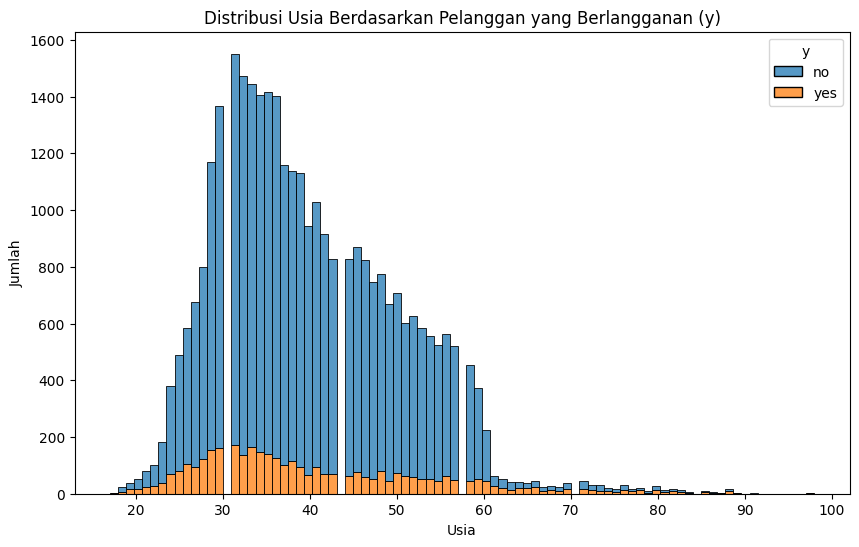

In [ ]:
from inspect import cleandoc

plt.figure(figsize=(10, 6))
sns.histplot(df_clean, x='age', hue='y', multiple='stack')
plt.title('Distribusi Usia Berdasarkan Pelanggan yang Berlangganan (y)')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()


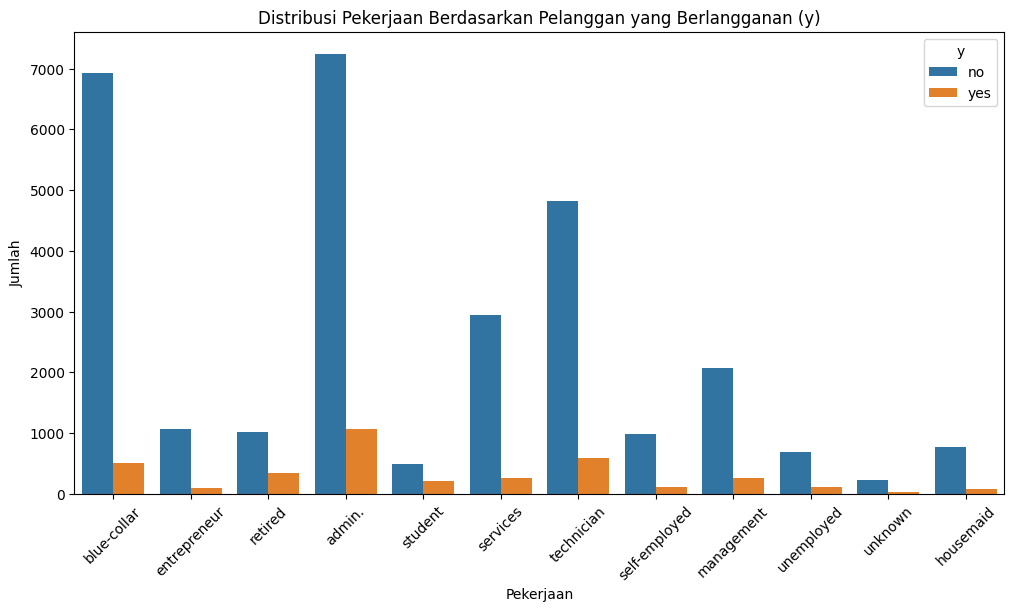

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(df_clean, x='job', hue='y')
plt.title('Distribusi Pekerjaan Berdasarkan Pelanggan yang Berlangganan (y)')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


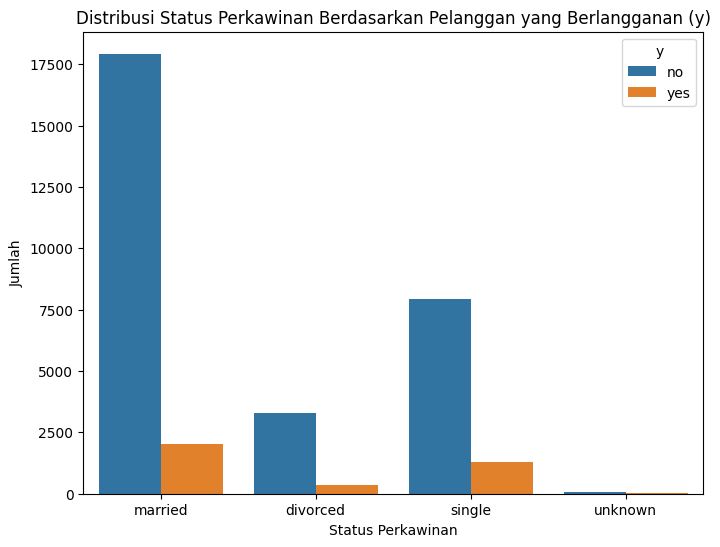

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(df_clean, x='marital', hue='y')
plt.title('Distribusi Status Perkawinan Berdasarkan Pelanggan yang Berlangganan (y)')
plt.xlabel('Status Perkawinan')
plt.ylabel('Jumlah')
plt.show()


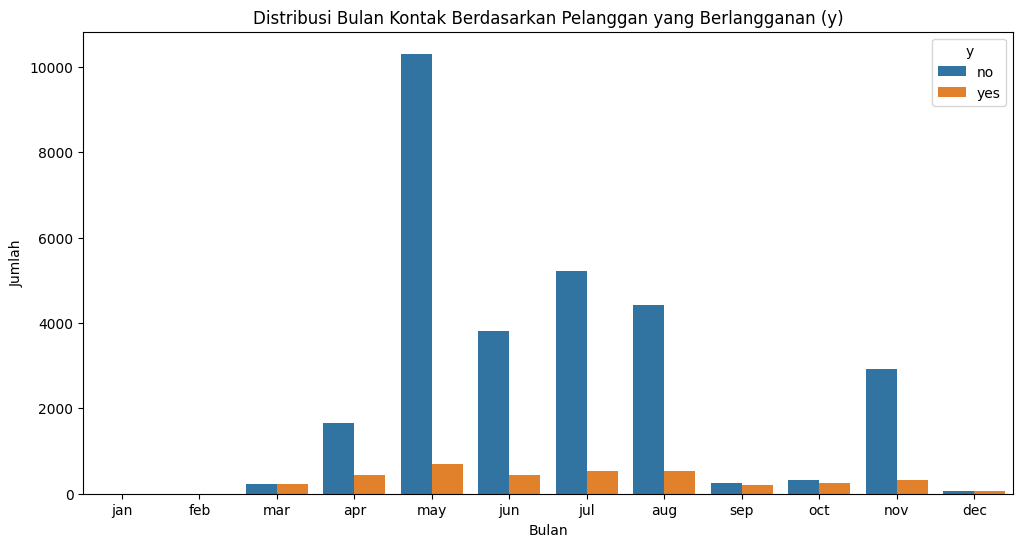

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(df_clean, x='month', hue='y', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Distribusi Bulan Kontak Berdasarkan Pelanggan yang Berlangganan (y)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.show()


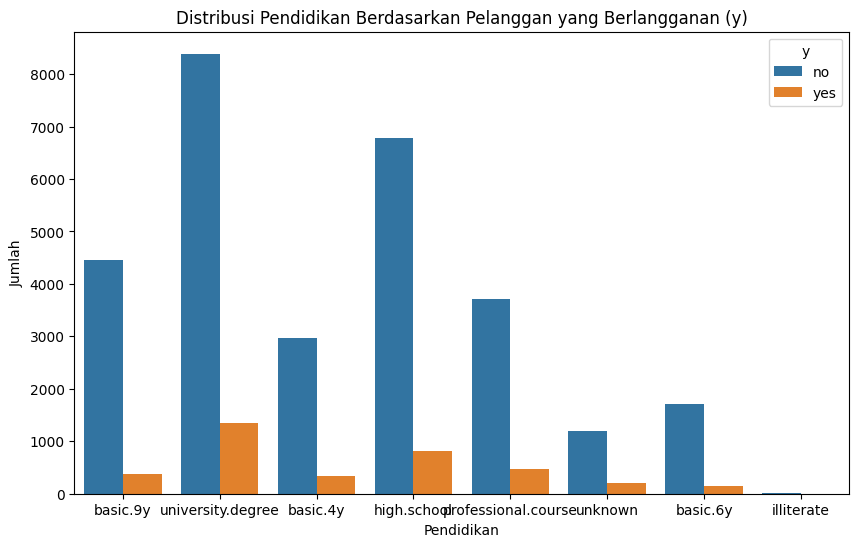

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df_clean, x='education', hue='y')
plt.title('Distribusi Pendidikan Berdasarkan Pelanggan yang Berlangganan (y)')
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah')
plt.show()


# Handling Outlier

**Age (Usia):** Usia umumnya memiliki rentang nilai yang terbatas dan cenderung terdistribusi secara normal. Namun, ada kemungkinan adanya nilai usia yang ekstrem yang tidak sesuai dengan pola umum, seperti orang yang memiliki usia yang jauh di atas atau di bawah rata-rata usia target.

**Duration (Durasi Panggilan):** Durasi panggilan telepon mungkin memiliki distribusi yang sangat bervariasi. Meskipun panggilan biasanya memiliki durasi yang singkat, ada kemungkinan adanya panggilan yang sangat panjang yang merupakan outlier dan tidak mewakili pola umum.

**Campaign (Jumlah Kontak dalam Kampanye Ini):** Jumlah kontak yang dilakukan kepada pelanggan selama kampanye dapat bervariasi, tetapi ada kemungkinan adanya pelanggan yang dihubungi secara berlebihan atau sangat sedikit dibandingkan dengan kebanyakan pelanggan, yang mungkin merupakan outlier.

**Pdays (Jumlah Hari Sejak Kontak Terakhir dalam Kampanye Sebelumnya):** Nilai pdays yang tinggi mungkin menunjukkan bahwa pelanggan tidak dihubungi dalam kampanye sebelumnya atau memiliki periode waktu yang lama sejak kontak terakhir. Namun, nilai yang sangat tinggi atau rendah mungkin merupakan outlier yang tidak umum.

**Previous (Jumlah Kontak Sebelum Kampanye Ini):** Jumlah kontak yang dilakukan kepada pelanggan sebelum kampanye saat ini juga dapat bervariasi. Namun, ada kemungkinan adanya pelanggan yang dihubungi secara berlebihan atau sangat sedikit sebelumnya, yang mungkin merupakan outlier.

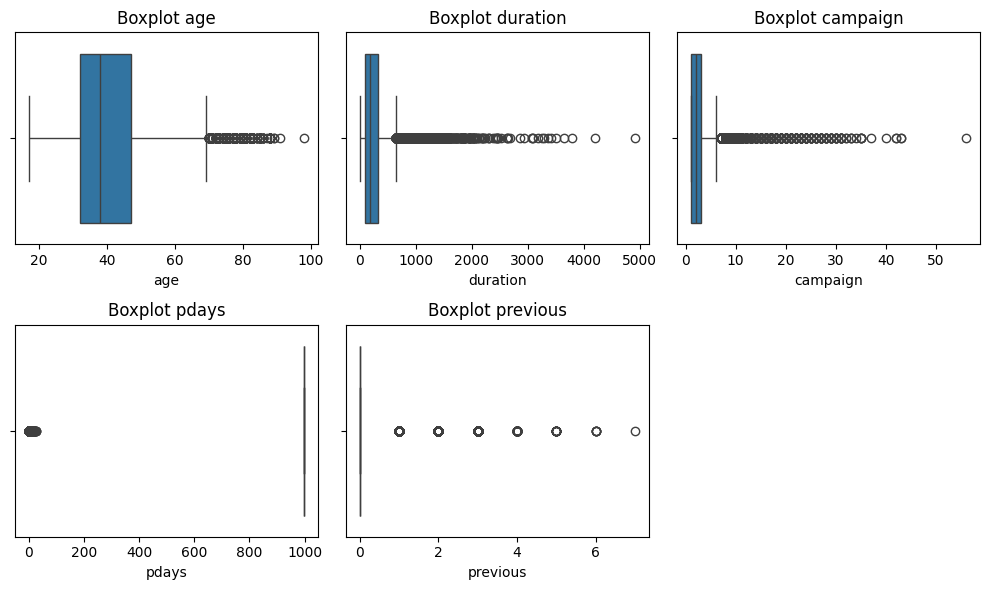

In [ ]:

plt.figure(figsize=(10, 6))

features = ['age', 'duration', 'campaign', 'pdays', 'previous']

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()


In [ ]:

def handle_outliers_iqr(df, features):
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data_cleaned = handle_outliers_iqr(df_clean, ['age', 'duration', 'campaign', 'pdays', 'previous'])


print("Dimensi dataset setelah menghapus outlier:", data_cleaned.shape)


Dimensi dataset setelah menghapus outlier: (24439, 16)


# One Hot Encoding

In [ ]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_encoded = pd.get_dummies(data_cleaned, columns=cat_vars, drop_first=True)

In [ ]:
data_encoded

,age,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,49,227,4,999,0,no,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,36,120,2,999,0,no,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,59,368,2,999,0,no,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
5,29,256,2,999,0,no,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,26,449,1,999,0,yes,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32943,47,64,3,999,0,no,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
32945,28,192,1,999,0,no,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
32947,54,131,4,999,0,no,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
32948,29,165,1,999,0,no,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


# Logistic Regression

In [ ]:
X = data_encoded.drop('y', axis=1)
y = data_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[6867   56]
 [ 355   54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      6923
           1       0.49      0.13      0.21       409

    accuracy                           0.94      7332
   macro avg       0.72      0.56      0.59      7332
weighted avg       0.93      0.94      0.93      7332

Accuracy Score: 0.9439443535188216


In [ ]:

new_data = pd.DataFrame({
    'age': [30, 45],
    'job': ['technician', 'blue-collar'],
    'marital': ['married', 'single'],
    'education': ['tertiary', 'secondary'],
    'default': ['no', 'no'],
    'housing': ['yes', 'yes'],
    'loan': ['no', 'yes'],
    'contact': ['cellular', 'cellular'],
    'month': ['may', 'jul'],
    'day_of_week': ['mon', 'wed'],
    'duration': [150, 200],
    'campaign': [2, 3],
    'pdays': [999, 999],
    'previous': [0, 0],
    'poutcome': ['nonexistent', 'nonexistent']
})


missing_cols = set(X.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0
new_data = new_data[X.columns]

predictions = model.predict(new_data)
predictions_proba = model.predict_proba(new_data)[:, 1]

print("Prediksi:", predictions)
print("Probabilitas:", predictions_proba)


Prediksi: [0 0]
Probabilitas: [0.08644515 0.11174007]



Skor akurasi pada setiap lipatan memiliki variasi yang kecil, menunjukkan bahwa model memiliki kinerja yang konsisten pada data yang berbeda-beda.
Rata-rata Skor Akurasi:

Rata-rata skor akurasi yang tinggi (sekitar 94.49%) menunjukkan bahwa model memiliki kinerja yang baik secara keseluruhan pada dataset tersebut.
Evaluasi Model:

Dengan rata-rata skor akurasi yang tinggi, dapat diasumsikan bahwa model Logistic Regression yang Anda buat mampu dengan baik dalam mengidentifikasi pelanggan yang berpotensi berlangganan deposito jangka panjang.

In [ ]:
from sklearn.model_selection import cross_val_score

k = 10
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

print(f'Cross-validation scores (accuracy) for each fold: {scores}')
print(f'Mean cross-validation score (accuracy): {scores.mean()}')

Cross-validation scores (accuracy) for each fold: [0.9492635  0.94476268 0.94639935 0.9410802  0.94476268 0.94803601
 0.94476268 0.94353519 0.94312602 0.94351208]
Mean cross-validation score (accuracy): 0.9449240389556186


# insight

**Kinerja Model:**

Model memiliki akurasi yang tinggi, dengan nilai sekitar 94.39%, namun memiliki performa yang rendah dalam mengidentifikasi pelanggan yang berpotensi berlangganan (kelas 1). Hal ini terlihat dari nilai recall yang rendah (13%) untuk kelas 1.

**Klasifikasi Pelanggan:**

Model memiliki kecenderungan untuk lebih sering memprediksi bahwa pelanggan tidak akan berlangganan deposito jangka panjang (kelas 0), yang tercermin dari presisi yang tinggi (95%) untuk kelas 0.

**Keperluan Aksi Lanjutan:**

Model perlu ditingkatkan kemampuannya dalam mengidentifikasi pelanggan yang berpotensi berlangganan (kelas 1). Ini bisa dilakukan dengan menambahkan fitur tambahan yang relevan, atau menggunakan algoritma yang lebih kompleks.

**Resiko dan Keuntungan:**

Meskipun model memiliki akurasi keseluruhan yang tinggi, penting untuk diingat bahwa ketidakseimbangan kelas dapat mempengaruhi evaluasi kinerja model. Dalam kasus ini, perlu dipertimbangkan keseimbangan antara risiko (mis. kehilangan pelanggan berpotensi) dan keuntungan (mis. mengidentifikasi pelanggan yang berlangganan).

**Pengambilan Keputusan Bisnis:**

Penggunaan model ini dapat membantu dalam merencanakan strategi pemasaran yang lebih efektif, dengan lebih fokus pada pelanggan yang memiliki probabilitas tinggi untuk berlangganan. Namun, model ini harus dipertimbangkan secara hati-hati dalam konteks bisnis untuk memastikan bahwa keputusan yang diambil adalah yang terbaik untuk perusahaan.
Dengan memperhatikan insight di atas, Anda dapat melakukan penyesuaian dan perbaikan pada model untuk meningkatkan kemampuannya dalam mengidentifikasi pelanggan yang berpotensi berlangganan deposito jangka panjang, serta mengambil keputusan yang lebih tepat dalam konteks bisnis.